In [2]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Cargar datos

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalizar las imágenes

In [5]:
training_images= training_images / 255.0
test_images= test_images / 255.0

#Construcción del modelo

In [6]:
model= keras.Sequential([keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
                         keras.layers.MaxPooling2D(2,2),
                         keras.layers.Flatten(),
                        keras.layers.Dense(128, activation='relu'),
                        keras.layers.Dense(10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

#Compilar modelo

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Entrenar el modelo

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3835 - accuracy: 0.8645
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2622 - accuracy: 0.9049
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2204 - accuracy: 0.9190
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1885 - accuracy: 0.9301
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1617 - accuracy: 0.9391
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1390 - accuracy: 0.9479
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1170 - accuracy: 0.9567
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1003 - accuracy: 0.9630
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0840 - accuracy: 0.9685
Epoch 10/10
1875/1875 [==============================] - 37s 20m

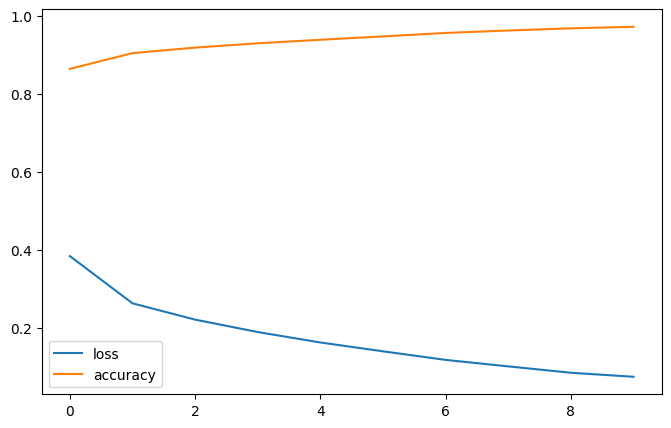

In [8]:
history=model.fit(training_images, training_labels, epochs=10)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

# Evaluación del modelo


In [9]:
loss, accuracy = model.evaluate(training_images, training_labels)
print('accuracy training: ',accuracy)
print('loss training: ',loss)

loss, accuracy = model.evaluate(test_images, test_labels)
print('accuracy test: ',accuracy)
print('loss test: ',loss)

1875/1875 [==============================] - 12s 6ms/step - loss: 0.0605 - accuracy: 0.9787
accuracy training:  0.978683352470398
loss training:  0.060480426996946335
313/313 [==============================] - 2s 6ms/step - loss: 0.3143 - accuracy: 0.9114
accuracy test:  0.9114000201225281
loss test:  0.3142535090446472


# Predicción

Label: 2
1/1 [==============================] - 0s 112ms/step
Classification: [[1.2004747e-09]
 [1.1357139e-19]
 [9.9997091e-01]
 [1.6708501e-10]
 [4.5176890e-08]
 [2.2213067e-18]
 [2.9124909e-05]
 [1.1801732e-17]
 [6.2123151e-19]
 [1.0516764e-16]]


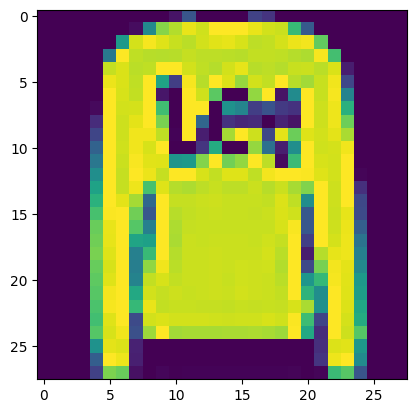

In [10]:
index=1
print(f'Label: {test_labels[index]}')
classification=model.predict(test_images[index:index+1])
print(f'Classification: {classification.reshape(-1,1)}')
plt.imshow(test_images[index])
plt.show()

#Varios

In [11]:
print(test_labels[:30])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3]


In [12]:
FIRST_IMAGE=3
SECOND_IMAGE=10
THIRD_IMAGE=25

print(f'Label: {test_labels[FIRST_IMAGE]}')
print(f'Label: {test_labels[SECOND_IMAGE]}')
print(f'Label: {test_labels[THIRD_IMAGE]}')

Label: 1
Label: 4
Label: 4


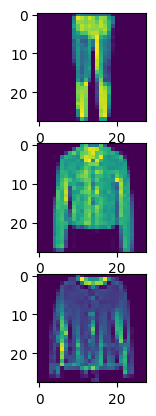

In [13]:
f,axarr=plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

In [14]:
layer=0
filter1=0
filter2=10

layer_output=[layer.output for layer in model.layers]
activation_model=keras.models.Model(inputs=model.input, outputs=layer_output)

1/1 [==============================] - 0s 34ms/step


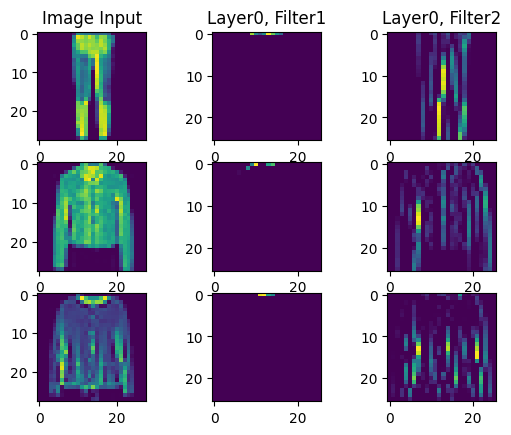

In [15]:
f,axarr=plt.subplots(3,3)
axarr[0,0].set_title("Image Input")
axarr[0,0].imshow(test_images[FIRST_IMAGE])
f1=activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[layer]
axarr[0,1].set_title("Layer"+str(layer)+", Filter1")
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title("Layer"+str(layer)+", Filter2")
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(test_images[SECOND_IMAGE])
f2=activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[layer]
axarr[1,1].imshow(f2[0,:,:,filter1])
axarr[1,2].imshow(f2[0,:,:,filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE])
f3=activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[layer]
axarr[2,1].imshow(f3[0,:,:,filter1])
axarr[2,2].imshow(f3[0,:,:,filter2])


In [16]:
FIRST_IMAGE=2
SECOND_IMAGE=5
THIRD_IMAGE=14

# Preguntas:

# ¿Qué cambios podrías hacer en la arquitectura de la red neuronal
#convolucional para mejorar su rendimiento?

#R/. Se podrían realizar varios cambios en la arquitectura de la red neuronal convolucional para mejorar su rendimiento:

# 1. **Aumentar la profundidad de la red:** Agregar más capas convolucionales y de pooling puede ayudar a la red a aprender características más complejas y mejorar su capacidad de generalización.
# 2. **Utilizar filtros de diferentes tamaños:** Experimentar con diferentes tamaños de filtros en las capas convolucionales puede ayudar a la red a capturar características a diferentes escalas.
# 3. **Agregar capas de regularización:** Técnicas como el dropout o la regularización L2 pueden ayudar a prevenir el sobreajuste y mejorar la capacidad de generalización del modelo.
# 4. **Utilizar técnicas de aumento de datos:** El aumento de datos puede ayudar a aumentar la cantidad de datos de entrenamiento y mejorar la capacidad de generalización del modelo.
# 5. **Ajustar los hiperparámetros:** Experimentar con diferentes valores para los hiperparámetros, como la tasa de aprendizaje, el tamaño del lote y el número de épocas, puede ayudar a encontrar la configuración óptima para el modelo.

# ¿Cómo afectaría el aumento del número de filtros en la capa convolucional al rendimiento del modelo?

# R./ Aumentar el número de filtros podría ayudar a la red a capturar más características de las imágenes que le permitan hacer una clasificación más precisa. En cuanto al rendimiento se puede ver afectado, pues necesitará hacer más cálculos

#¿Cuál es el impacto de agregar más capas convolucionales y de agrupación en la precisión del modelo?

#R/. Agregar más capas convolucionales y de agrupación en un modelo CNN para el conjunto de datos Fashion MNIST puede mejorar la precisión al permitir que el modelo aprenda características más complejas y de mayor nivel. Sin embargo, también puede llevar a una mayor complejidad computacional y riesgo de sobreajuste si no se maneja adecuadamente.

#¿Cómo cambiaría el rendimiento del modelo si se ajusta el tamaño de los filtros en la capa convolucional?

#R/. Cambiar el tamaño de los filtros (kernels) en las capas convolucionales afecta el campo receptivo de la red. Filtros más grandes pueden capturar características más globales, mientras que filtros más pequeños se enfocan en detalles más finos. Ajustar el tamaño de los filtros puede mejorar la precisión del modelo al encontrar un equilibrio adecuado para las características del conjunto de datos.

#¿Qué diferencias notaste en el tiempo de entrenamiento al cambiar el número de épocas?

#R/. Aumentar el número de épocas generalmente mejora la precisión del modelo hasta cierto punto, permitiendo un aprendizaje más profundo. Sin embargo, también incrementa el tiempo de entrenamiento y puede llevar al sobreajuste si se entrena durante demasiadas épocas.

#¿Cuál es el efecto de modificar la tasa de aprendizaje del optimizador Adam en el rendimiento del modelo?

#R/. La tasa de aprendizaje afecta la rapidez y estabilidad del proceso de entrenamiento. Una tasa de aprendizaje más alta puede acelerar el entrenamiento pero corre el riesgo de no converger o saltar sobre mínimos óptimos. Una tasa de aprendizaje más baja puede llevar a una convergencia más estable pero más lenta.

#¿Qué sucede si se cambia la función de activación en las capas convolucionales?

#R/. Cambiar la función de activación puede alterar significativamente el rendimiento del modelo. Funciones de activación comunes como ReLU, tanh, y sigmoid tienen diferentes características que pueden influir en cómo se aprenden las características. ReLU es popular en CNNs por su capacidad de introducir no linealidades sin saturarse fácilmente.

#¿Qué pasa si se utiliza una arquitectura de red más profunda con más capas densas?

#R/. Agregar más capas densas en una arquitectura profunda puede permitir que el modelo aprenda representaciones más complejas y abstractas. Sin embargo, también aumenta el riesgo de sobreajuste y la complejidad computacional, requiriendo más técnicas de regularización y más datos para un entrenamiento efectivo.

#¿Cómo afectaría la adición de regularización, como la regularización L2, al rendimiento del modelo?

#R/. La regularización L2 puede ayudar a prevenir el sobreajuste penalizando los pesos grandes en la red. Esto conduce a una generalización mejor del modelo en datos no vistos, aunque puede reducir ligeramente la precisión en el conjunto de entrenamiento.
